# Tree modelling
In decision tree modelling, the model is a tree and not a equation.

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix

In [2]:
df = pd.read_csv('processed.cleveland.data',
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


age,

sex,

cp, chest pain

restbp, resting blood pressure (in mm Hg)

chol, serum cholesterol in mg/dl

fbs, fasting blood sugar

restecg, resting electrocardiographic results

thalach, maximum heart rate achieved

exang, exercise induced angina

oldpeak, ST depression induced by exercise relative to rest

slope, the slope of the peak exercise ST segment.

ca, number of major vessels (0-3) colored by fluoroscopy

thal, this is short of thalium heart scan.

hd, diagnosis of heart disease, the predicted attribute

In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [6]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
len(df[(df["ca"] == "?") | (df["thal"] == "?")])

6

In [9]:
df.shape

(303, 14)

In [10]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df_no_missing.shape

(297, 14)

In [11]:
df_no_missing.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [12]:
X = df_no_missing.drop('hd', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [13]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

**One Hot Encoding**

In [14]:
df["slope"].unique()

array([3., 2., 1.])

In [15]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'],dtype=int)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
y.unique()

array([0, 2, 1, 3, 4])

In [17]:
y[y>0] = 1
y.unique()

array([0, 1])

**Build A Preliminary Classification Tree**

At long last, the data are correctly formatted for making a Classification Tree. Now we simply split the data into training and testing sets and build the tree.

In [18]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt = clf_dt.fit(X_train, y_train)

In [19]:
X_encoded.columns

Index(['age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

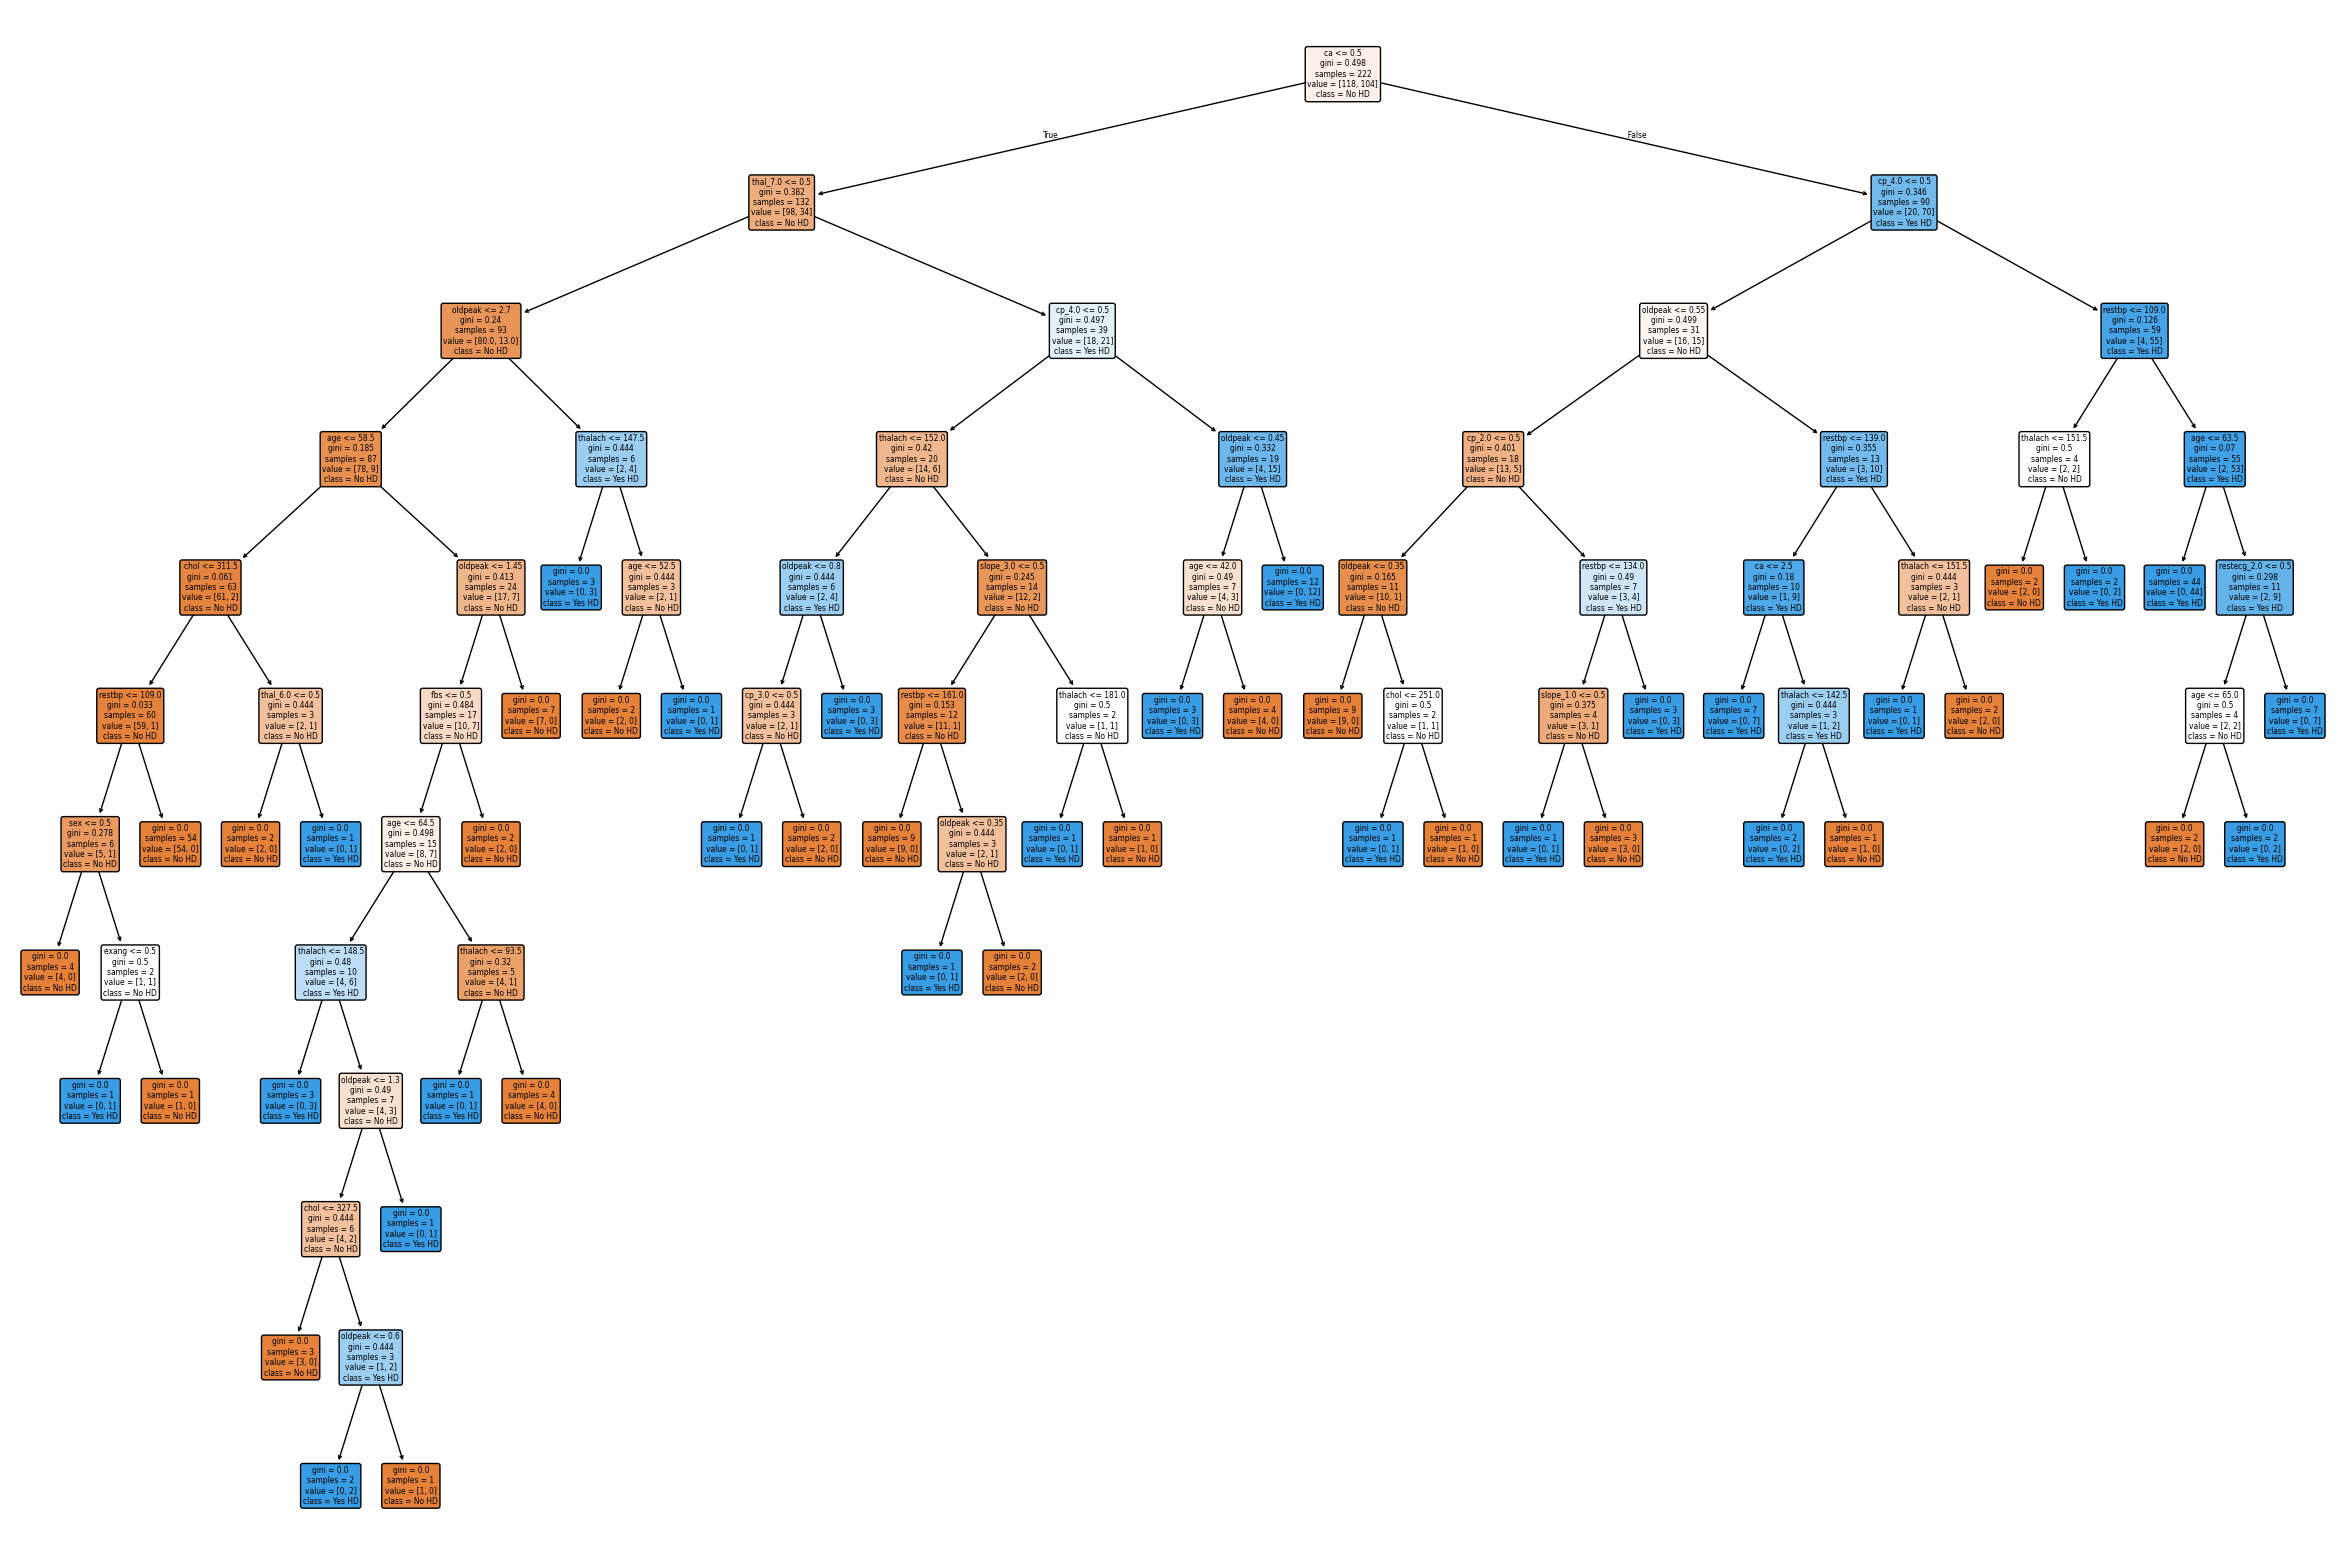

In [20]:
# Fig size less as fully grown tree is very large
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(30, 20))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

In [21]:
#predictions on the test data
y_pred = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [22]:
#predictions on train data for overfitting
y_pred_train = clf_dt.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       104

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



Overfitted.

In [23]:
# Random numbers taken as we dont know where the best values fall, working on range combination.

#creating dictionary of the hyperparameters to be tuned
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split': [2,5,10,20]
}

In [24]:
clf_dt = DecisionTreeClassifier(random_state=42)#instantiate the classifier

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_dt,
                           param_grid=params,
                           cv = 5,
                           scoring="accuracy")

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [26]:
#creating dictionary of the hyperparameters to be tuned
params2 = {
    'max_depth': range(3,6),
    'min_samples_leaf': range(5,11),
    'min_samples_split': range(2,6)
}

In [27]:
clf_dt = DecisionTreeClassifier(random_state=42)#instantiate the classifier

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_dt,
                           param_grid=params2,
                           cv = 5,
                           scoring="accuracy")

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_leaf': range(5, 11),
                         'min_samples_split': range(2, 6)},
             scoring='accuracy')

In [29]:
#final model
clf_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=42)

clf_dt = clf_dt.fit(X_train, y_train)

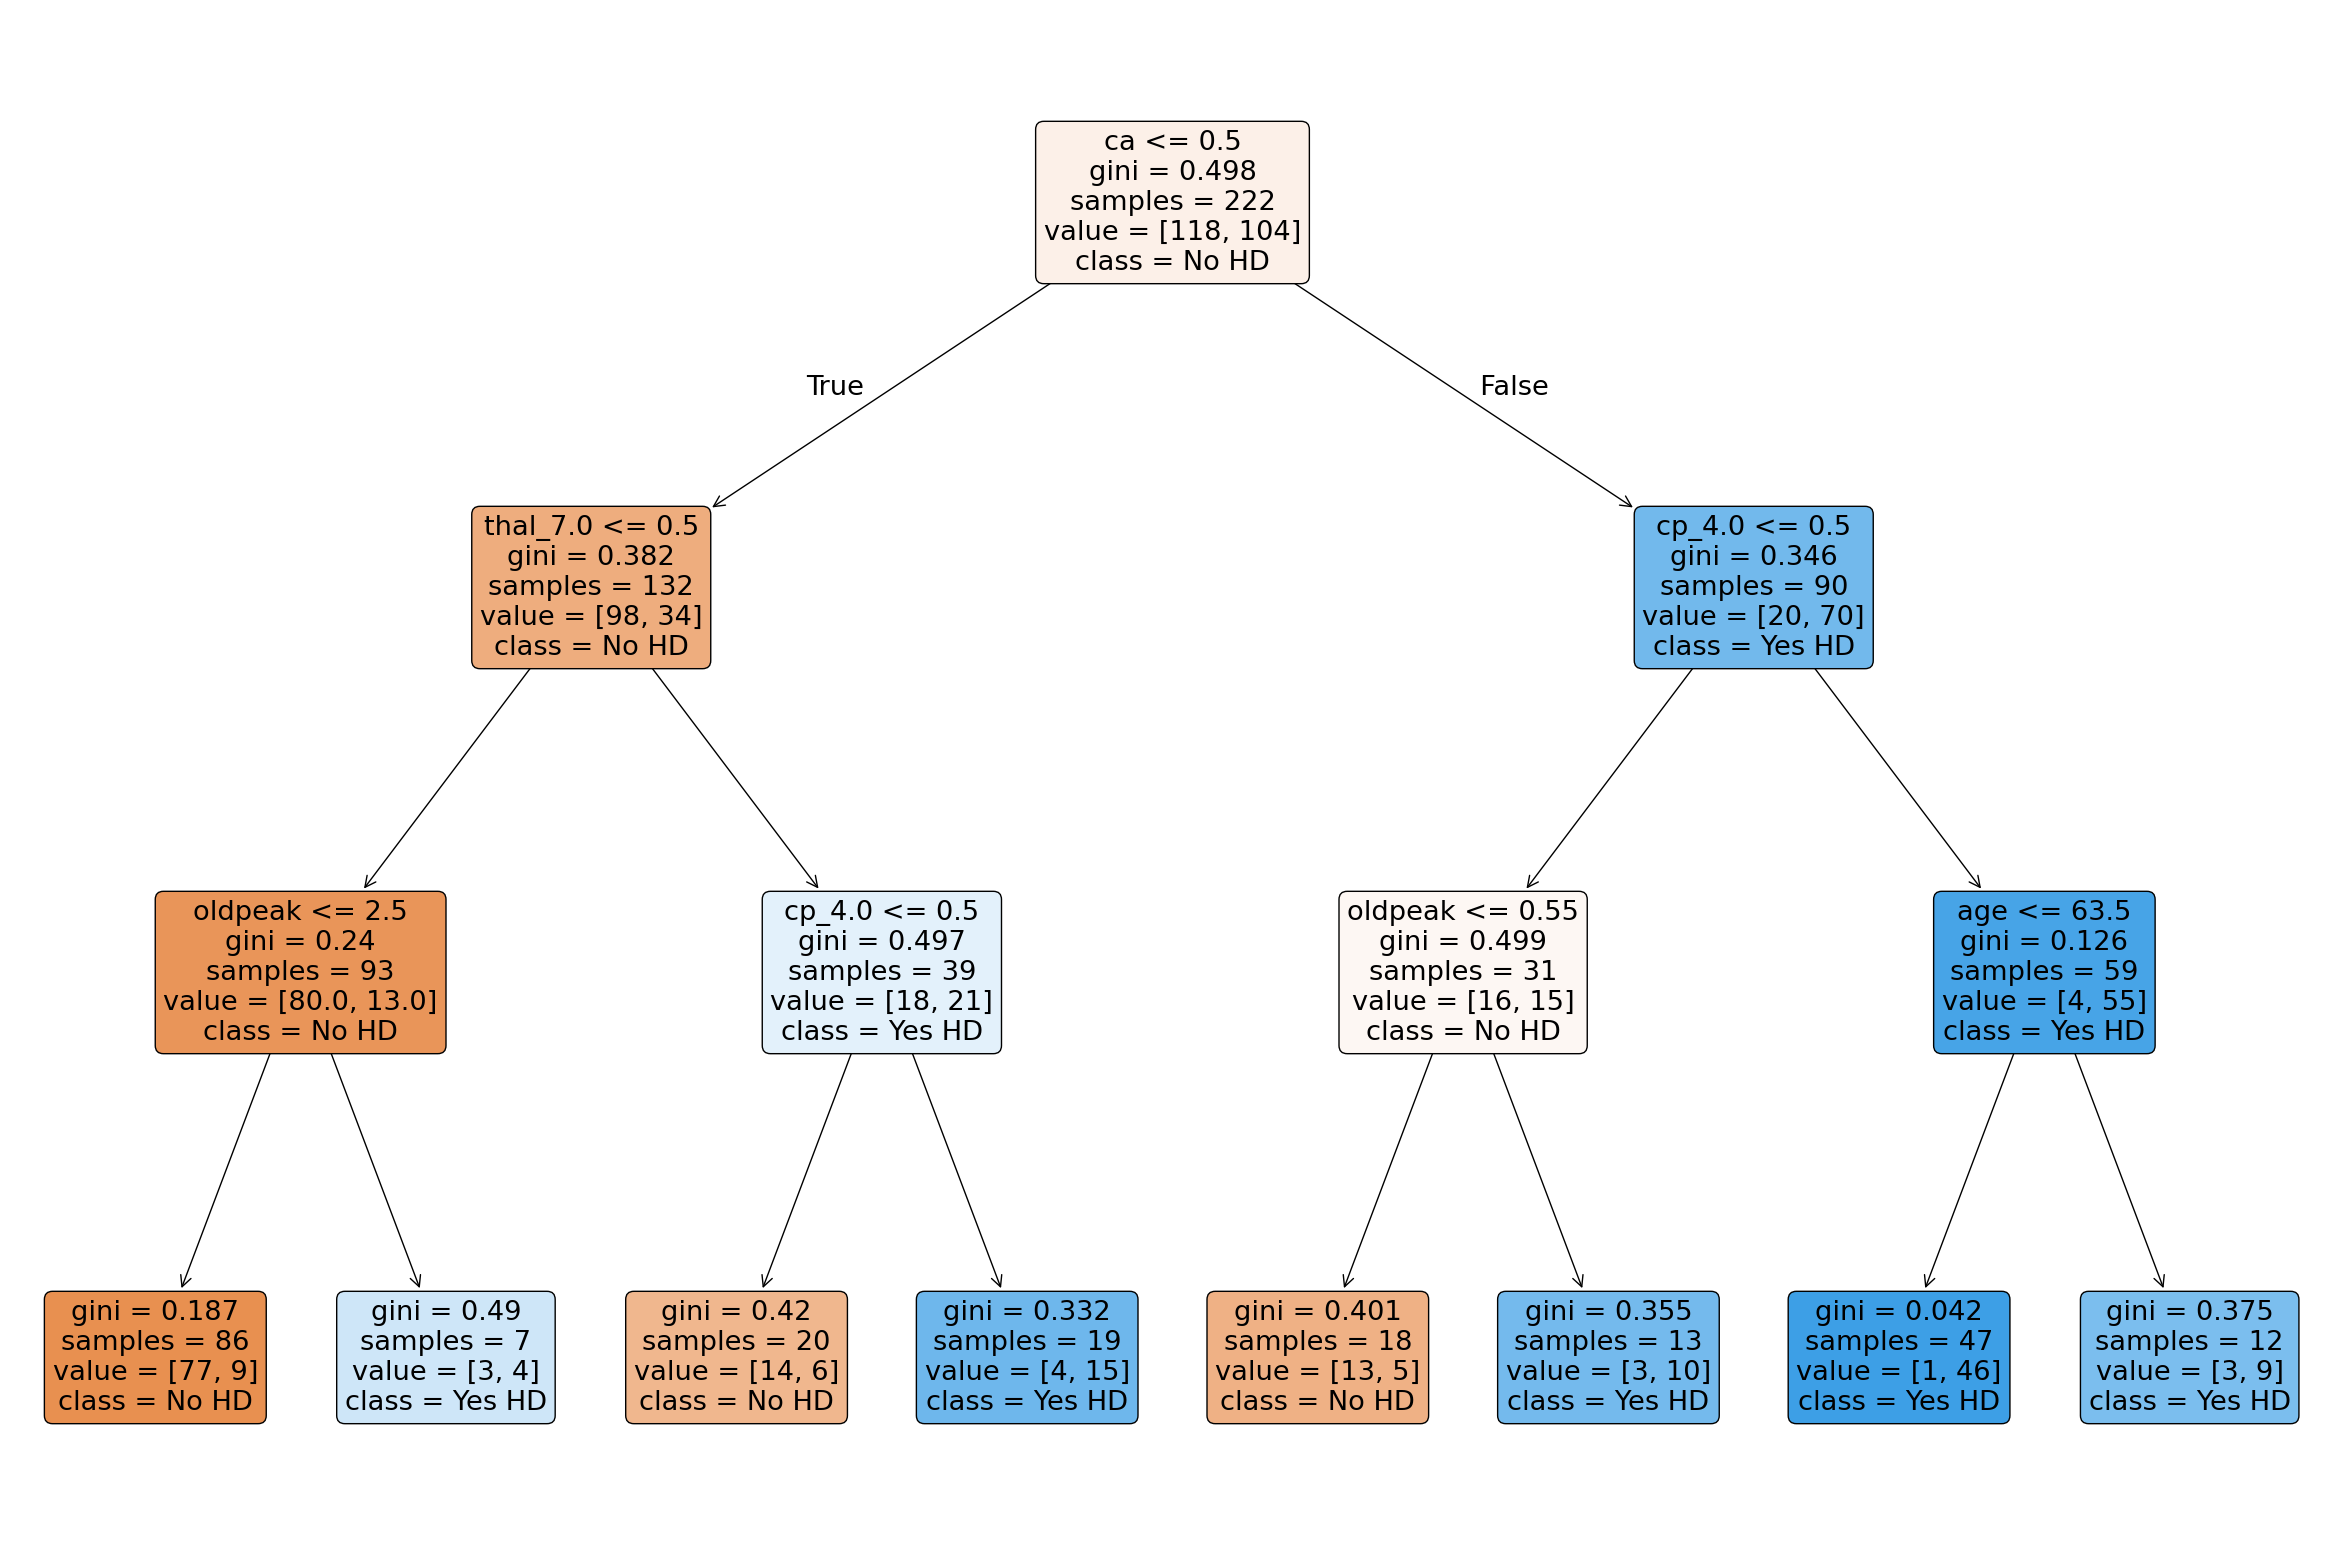

In [30]:
## NOTE: We can plot the tree and it is small!
plt.figure(figsize=(30, 20))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

**Depth/Height = 3 ; Means :- 0,1,2,3 (total 4 levels)**

In [31]:
y_pred = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [32]:
y_pred_train = clf_dt.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       118
           1       0.86      0.81      0.83       104

    accuracy                           0.85       222
   macro avg       0.85      0.84      0.85       222
weighted avg       0.85      0.85      0.85       222



Still Overfitting Issue.

## Pruning : Trimming unnecessary branches from the fully grown tree 
Depth control from reverse side (bottom to up)

CCT => Cost Complexity Tuning

Impure nodes(leaf) are measured using metrics like Gini impurity or Entropy.

Minimal Cost-Complexity Pruning is a method used in decision tree algorithms to reduce overfitting by trimming unnecessary branches from the tree. This process helps in creating a more generalized model that performs better on unseen data. Here’s a detailed explanation of how it works:

### 1. **Understanding the Basics**

- **Decision Tree**: A decision tree is a flowchart-like structure where each internal node represents a test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label.
- **Overfitting**: When a model learns the noise in the training data and performs poorly on new, unseen data.
- **Pruning**: The process of removing sections of the tree that provide little power in predicting target variables.

### 2. **Cost Complexity Pruning Process**

#### Step-by-Step Explanation:

1. **Grow a Full Tree**:
   - Initially, a full decision tree is grown until all leaves are pure (i.e., contain only one class) or contain less than a minimum number of samples.

2. **Calculate Impurity**:
   - The impurity of a node (leaf) can be measured using metrics like Gini impurity or entropy.
   - The total impurity of the tree is the sum of the impurities of all its leaves.

3. **Cost Complexity Measure**:
   - Define a cost complexity measure that balances the tree's size (complexity) and its fit to the training data.
   - The cost complexity measure \( R_{\alpha}(T) \) for a subtree \( T \) is defined as:
     \[
     R_{\alpha}(T) = R(T) + \alpha \cdot \left|T\right|
     \]
     where:
     - \( R(T) \) is the total impurity of the tree \( T \).
     - \( \left|T\right| \) is the number of terminal nodes (leaves) in the tree \( T \).
     - \( \alpha \) is a parameter that controls the trade-off between the complexity of the tree and its fit to the data. It is often called the complexity parameter or regularization parameter.

4. **Find the Optimal Alpha (\( \alpha \))**:
   - Different values of \( \alpha \) lead to different pruned trees.
   - As \( \alpha \) increases, the penalty for having a complex tree increases, leading to more aggressive pruning.
   - To find the optimal \( \alpha \), perform cost complexity pruning using a range of \( \alpha \) values and evaluate the resulting trees using cross-validation.

5. **Prune the Tree**:
   - Starting with the fully grown tree, iteratively remove the weakest link (i.e., the branch whose removal increases the cost complexity the least).
   - Continue pruning until the desired level of complexity (determined by the optimal \( \alpha \)) is achieved.

6. **Select the Best Tree**:
   - Use cross-validation to assess the performance of each pruned tree.
   - Select the tree with the best cross-validation score (i.e., the tree that generalizes best to unseen data).

### 3. **Practical Implementation**

Here's how the process is typically implemented in practice using a library like scikit-learn:

1. **Train the Full Tree**: Fit a decision tree to the training data without any pruning.
2. **Obtain Cost Complexity Pruning Path**: Use the `cost_complexity_pruning_path` method to obtain a series of trees pruned at different values of \( \alpha \).
3. **Cross-Validation**: For each pruned tree, perform cross-validation to find the optimal \( \alpha \).
4. **Select and Fit the Final Model**: Choose the tree corresponding to the optimal \( \alpha \) and fit it to the training data.


In [33]:
### Example Code Snippet
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Train the full decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Obtain cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [35]:
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523, 0.13046216])

In [36]:
# Train decision trees using different alphas
clfs = [] # empty list to store all the pruned trees
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf) # sent to the list above (Append means store all the aplha models in above list)

# Evaluate the models using cross-validation
cv_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]
cv_scores

[np.float64(0.7025252525252526),
 np.float64(0.7025252525252526),
 np.float64(0.7025252525252526),
 np.float64(0.7025252525252526),
 np.float64(0.7025252525252526),
 np.float64(0.7025252525252526),
 np.float64(0.697979797979798),
 np.float64(0.7025252525252526),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7207070707070707),
 np.float64(0.7296969696969697),
 np.float64(0.7341414141414141),
 np.float64(0.7341414141414141),
 np.float64(0.7252525252525253),
 np.float64(0.7297979797979798),
 np.float64(0.7523232323232323),
 np.float64(0.7345454545454546),
 np.float64(0.7345454545454546),
 np.float64(0.7027272727272728),
 np.float64(0.666969696969697),
 np.float64(0.666969696969697),
 np.float64(0.5584848484848485)]

In [37]:
# Find the optimal alpha
optimal_alpha_index = np.argmax(cv_scores)
optimal_alpha = ccp_alphas[optimal_alpha_index]
optimal_alpha

np.float64(0.014224751066856332)

In [38]:
# Train the final decision tree model with the optimal alpha
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
final_clf.fit(X_train, y_train)

# Evaluate the final model
final_accuracy = final_clf.score(X_test, y_test)
final_accuracy

0.8266666666666667

In [39]:
y_pred = final_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [40]:
y_predtrain = final_clf.predict(X_train)

print(classification_report(y_train, y_predtrain))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       118
           1       0.87      0.81      0.84       104

    accuracy                           0.85       222
   macro avg       0.85      0.85      0.85       222
weighted avg       0.85      0.85      0.85       222



Still overfitted.

## Random Forest

In [41]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data
rf = RandomForestClassifier(random_state=42)

#dictionary of the hyperparameters to be tuned
params = {
    'max_depth': [2,3],
    'min_samples_leaf': range(1,20),
    'n_estimators': range(15,20)
}

In [43]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': range(1, 20),
                         'n_estimators': range(15, 20)},
             scoring='accuracy')

In [44]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.90      0.82      0.86        33

    accuracy                           0.88        75
   macro avg       0.88      0.87      0.88        75
weighted avg       0.88      0.88      0.88        75



In [45]:
y_pred_train = grid_search.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       118
           1       0.91      0.77      0.83       104

    accuracy                           0.86       222
   macro avg       0.86      0.85      0.85       222
weighted avg       0.86      0.86      0.85       222



In [46]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=17,
                       random_state=42)

In [47]:
rf_best.feature_importances_

array([0.04134649, 0.03042965, 0.        , 0.03000412, 0.        ,
       0.07573129, 0.05932608, 0.08830042, 0.24071566, 0.        ,
       0.        , 0.0213373 , 0.1902499 , 0.0035264 , 0.        ,
       0.00844865, 0.02804853, 0.00372755, 0.        , 0.12610472,
       0.        , 0.05270324])

In [48]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,ca,0.240716
12,cp_4.0,0.190250
19,thal_3.0,0.126105
7,oldpeak,0.088300
5,thalach,0.075731
6,exang,0.059326
21,thal_7.0,0.052703
0,age,0.041346
1,sex,0.030430
3,chol,0.030004
